In [391]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn as sl

import warnings
warnings.filterwarnings('ignore')

In [392]:
#Load data
lead = pd.read_csv('Leads.csv')

In [393]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [394]:
lead.shape

(9240, 37)

In [395]:
#check for statestical values
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [396]:
#  1. Data prepration
# check for null values
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [397]:
null = lead.isnull().sum()

In [398]:
null.sort_values(ascending = False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [399]:
# %null 
null_p = (lead.isnull().sum()/len(lead))*100    

In [400]:
null_p.sort_values(ascending = False)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [401]:
# as there are huge nuber of null values we need to drop them
# In this case we are dropping the colums which having null values more than 30%
drop = null_p[null_p>15].index

In [402]:
drop

Index(['Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Quality',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

In [403]:
lead.drop(drop,axis = 1, inplace = True)

In [404]:
lead.isnull().sum()

Prospect ID                                   0
Lead Number                                   0
Lead Origin                                   0
Lead Source                                  36
Do Not Email                                  0
Do Not Call                                   0
Converted                                     0
TotalVisits                                 137
Total Time Spent on Website                   0
Page Views Per Visit                        137
Last Activity                               103
Search                                        0
Magazine                                      0
Newspaper Article                             0
X Education Forums                            0
Newspaper                                     0
Digital Advertisement                         0
Through Recommendations                       0
Receive More Updates About Our Courses        0
Update me on Supply Chain Content             0
Get updates on DM Content               

In [405]:
#Cross checkfor null %
null_p = (lead.isnull().sum()/len(lead))*100 

In [406]:
null_p.sort_values(ascending = False)

TotalVisits                                 1.482684
Page Views Per Visit                        1.482684
Last Activity                               1.114719
Lead Source                                 0.389610
Prospect ID                                 0.000000
X Education Forums                          0.000000
A free copy of Mastering The Interview      0.000000
I agree to pay the amount through cheque    0.000000
Get updates on DM Content                   0.000000
Update me on Supply Chain Content           0.000000
Receive More Updates About Our Courses      0.000000
Through Recommendations                     0.000000
Digital Advertisement                       0.000000
Newspaper                                   0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
Lead Number                                 0.000000
Search                                      0.000000
Total Time Spent on Website                 0.

In [407]:
lead.shape

(9240, 24)

In [408]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified


In [409]:
#Dropping remianing null values
lead = lead[~(lead['TotalVisits'].isnull())]

In [410]:
lead = lead[~(lead['Page Views Per Visit'].isnull())]

In [411]:
lead = lead[~(lead['Last Activity'].isnull())]

In [412]:
lead = lead[~(lead['Lead Source'].isnull())]

In [413]:
#Check for null values
lead.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Update me on Supply Chain Content           0
Get updates on DM Content                   0
I agree to pay the amount through 

In [414]:
#Dropping Prospect ID and Lead Number as there is no use for our analysis
lead.drop(['Lead Number','Prospect ID'], axis = 1, inplace = True)

In [415]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,No,...,No,No,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,No,...,No,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,No,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,No,...,No,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,No,...,No,No,No,No,No,No,No,No,No,Modified


In [416]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9074 non-null   object 
 1   Lead Source                               9074 non-null   object 
 2   Do Not Email                              9074 non-null   object 
 3   Do Not Call                               9074 non-null   object 
 4   Converted                                 9074 non-null   int64  
 5   TotalVisits                               9074 non-null   float64
 6   Total Time Spent on Website               9074 non-null   int64  
 7   Page Views Per Visit                      9074 non-null   float64
 8   Last Activity                             9074 non-null   object 
 9   Search                                    9074 non-null   object 
 10  Magazine                            

In [417]:
lead['Lead Origin'].value_counts()

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

In [418]:
lead['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
testone                 1
WeLearn                 1
welearnblog_Home        1
NC_EDM                  1
youtubechannel          1
Pay per Click Ads       1
blog                    1
Name: Lead Source, dtype: int64

In [419]:
lead['Do Not Email'].value_counts()

No     8358
Yes     716
Name: Do Not Email, dtype: int64

In [420]:
lead['Do Not Call'].value_counts()

No     9072
Yes       2
Name: Do Not Call, dtype: int64

In [421]:
lead['Converted'].value_counts()

0    5639
1    3435
Name: Converted, dtype: int64

In [422]:
lead['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [423]:
lead['Search'].value_counts()

No     9060
Yes      14
Name: Search, dtype: int64

In [424]:
lead['Magazine'].value_counts()

No    9074
Name: Magazine, dtype: int64

In [425]:
lead['Newspaper Article'].value_counts()

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

In [426]:
lead['X Education Forums'].value_counts()

No     9073
Yes       1
Name: X Education Forums, dtype: int64

In [427]:
lead['Newspaper'].value_counts()

No     9073
Yes       1
Name: Newspaper, dtype: int64

In [428]:
lead['Digital Advertisement'].value_counts()

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

In [429]:
lead['Through Recommendations'].value_counts()

No     9067
Yes       7
Name: Through Recommendations, dtype: int64

In [430]:
lead['Receive More Updates About Our Courses'].value_counts()

No    9074
Name: Receive More Updates About Our Courses, dtype: int64

In [431]:
lead['Update me on Supply Chain Content'].value_counts()

No    9074
Name: Update me on Supply Chain Content, dtype: int64

In [432]:
lead['Get updates on DM Content'].value_counts()

No    9074
Name: Get updates on DM Content, dtype: int64

In [433]:
lead['I agree to pay the amount through cheque'].value_counts()

No    9074
Name: I agree to pay the amount through cheque, dtype: int64

In [434]:
lead['A free copy of Mastering The Interview'].value_counts()

No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [435]:
lead['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Resubscribed to emails             1
Form Submitted on Website          1
Approached upfront                 1
View in browser link Clicked       1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [436]:
#Everything looks good no abnormal values are present

In [437]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,No,...,No,No,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,No,...,No,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,No,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,No,...,No,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,No,...,No,No,No,No,No,No,No,No,No,Modified


In [438]:
#Convert yes == 1 and no == 0
def convert(x):
    if x == 'Yes':
        return 1
    elif x == 'No':
        return 0


In [439]:
lead['Do Not Email'] = lead['Do Not Email'].apply(convert)

In [440]:
lead['Do Not Call'] = lead['Do Not Call'].apply(convert)

In [441]:
lead['Search'] = lead['Search'].apply(convert)

In [442]:
lead['Magazine'] = lead['Magazine'].apply(convert)

In [443]:
lead['Newspaper Article'] = lead['Newspaper Article'].apply(convert)

In [444]:
lead['X Education Forums'] = lead['X Education Forums'].apply(convert)

In [445]:
lead['Newspaper'] = lead['Newspaper'].apply(convert)

In [446]:
lead['Digital Advertisement'] = lead['Digital Advertisement'].apply(convert)

In [447]:
lead['Through Recommendations'] = lead['Through Recommendations'].apply(convert)

In [448]:
lead['Receive More Updates About Our Courses'] = lead['Receive More Updates About Our Courses'].apply(convert)

In [449]:
lead['Update me on Supply Chain Content'] = lead['Update me on Supply Chain Content'].apply(convert)

In [450]:
lead['Get updates on DM Content'] = lead['Get updates on DM Content'].apply(convert)

In [451]:
lead['I agree to pay the amount through cheque'] = lead['I agree to pay the amount through cheque'].apply(convert)

In [452]:
lead['A free copy of Mastering The Interview'] = lead['A free copy of Mastering The Interview'].apply(convert)

In [453]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,0,...,0,0,0,0,0,0,0,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,0,...,0,0,0,0,0,0,0,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,0,...,0,0,0,0,0,0,0,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,0,...,0,0,0,0,0,0,0,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,0,...,0,0,0,0,0,0,0,0,0,Modified


In [454]:
type(lead['Newspaper'][0])

numpy.int64

In [455]:
#Create dummy variables
d1 = pd.get_dummies(lead['Lead Origin'],drop_first = True)

In [456]:
d2 = pd.get_dummies(lead['Lead Source'],drop_first = True)

In [457]:
d3 = pd.get_dummies(lead['Last Activity'],drop_first = True)

In [458]:
d4 = pd.get_dummies(lead['Last Notable Activity'], drop_first = True)

In [459]:
#Concat dummies and main data frame
lead = pd.concat([lead,d1,d2,d3,d4],axis = 1)

In [460]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,...,Form Submitted on Website,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,0,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,0,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,0,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,0,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,0,...,0,0,1,0,0,0,0,0,0,0


In [461]:
#Dropping main categorical columms
lead.drop(['Lead Origin','Lead Source','Last Activity','Last Notable Activity'],axis = 1,inplace = True)

In [462]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 72 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              9074 non-null   int64  
 1   Do Not Call                               9074 non-null   int64  
 2   Converted                                 9074 non-null   int64  
 3   TotalVisits                               9074 non-null   float64
 4   Total Time Spent on Website               9074 non-null   int64  
 5   Page Views Per Visit                      9074 non-null   float64
 6   Search                                    9074 non-null   int64  
 7   Magazine                                  9074 non-null   int64  
 8   Newspaper Article                         9074 non-null   int64  
 9   X Education Forums                        9074 non-null   int64  
 10  Newspaper                           

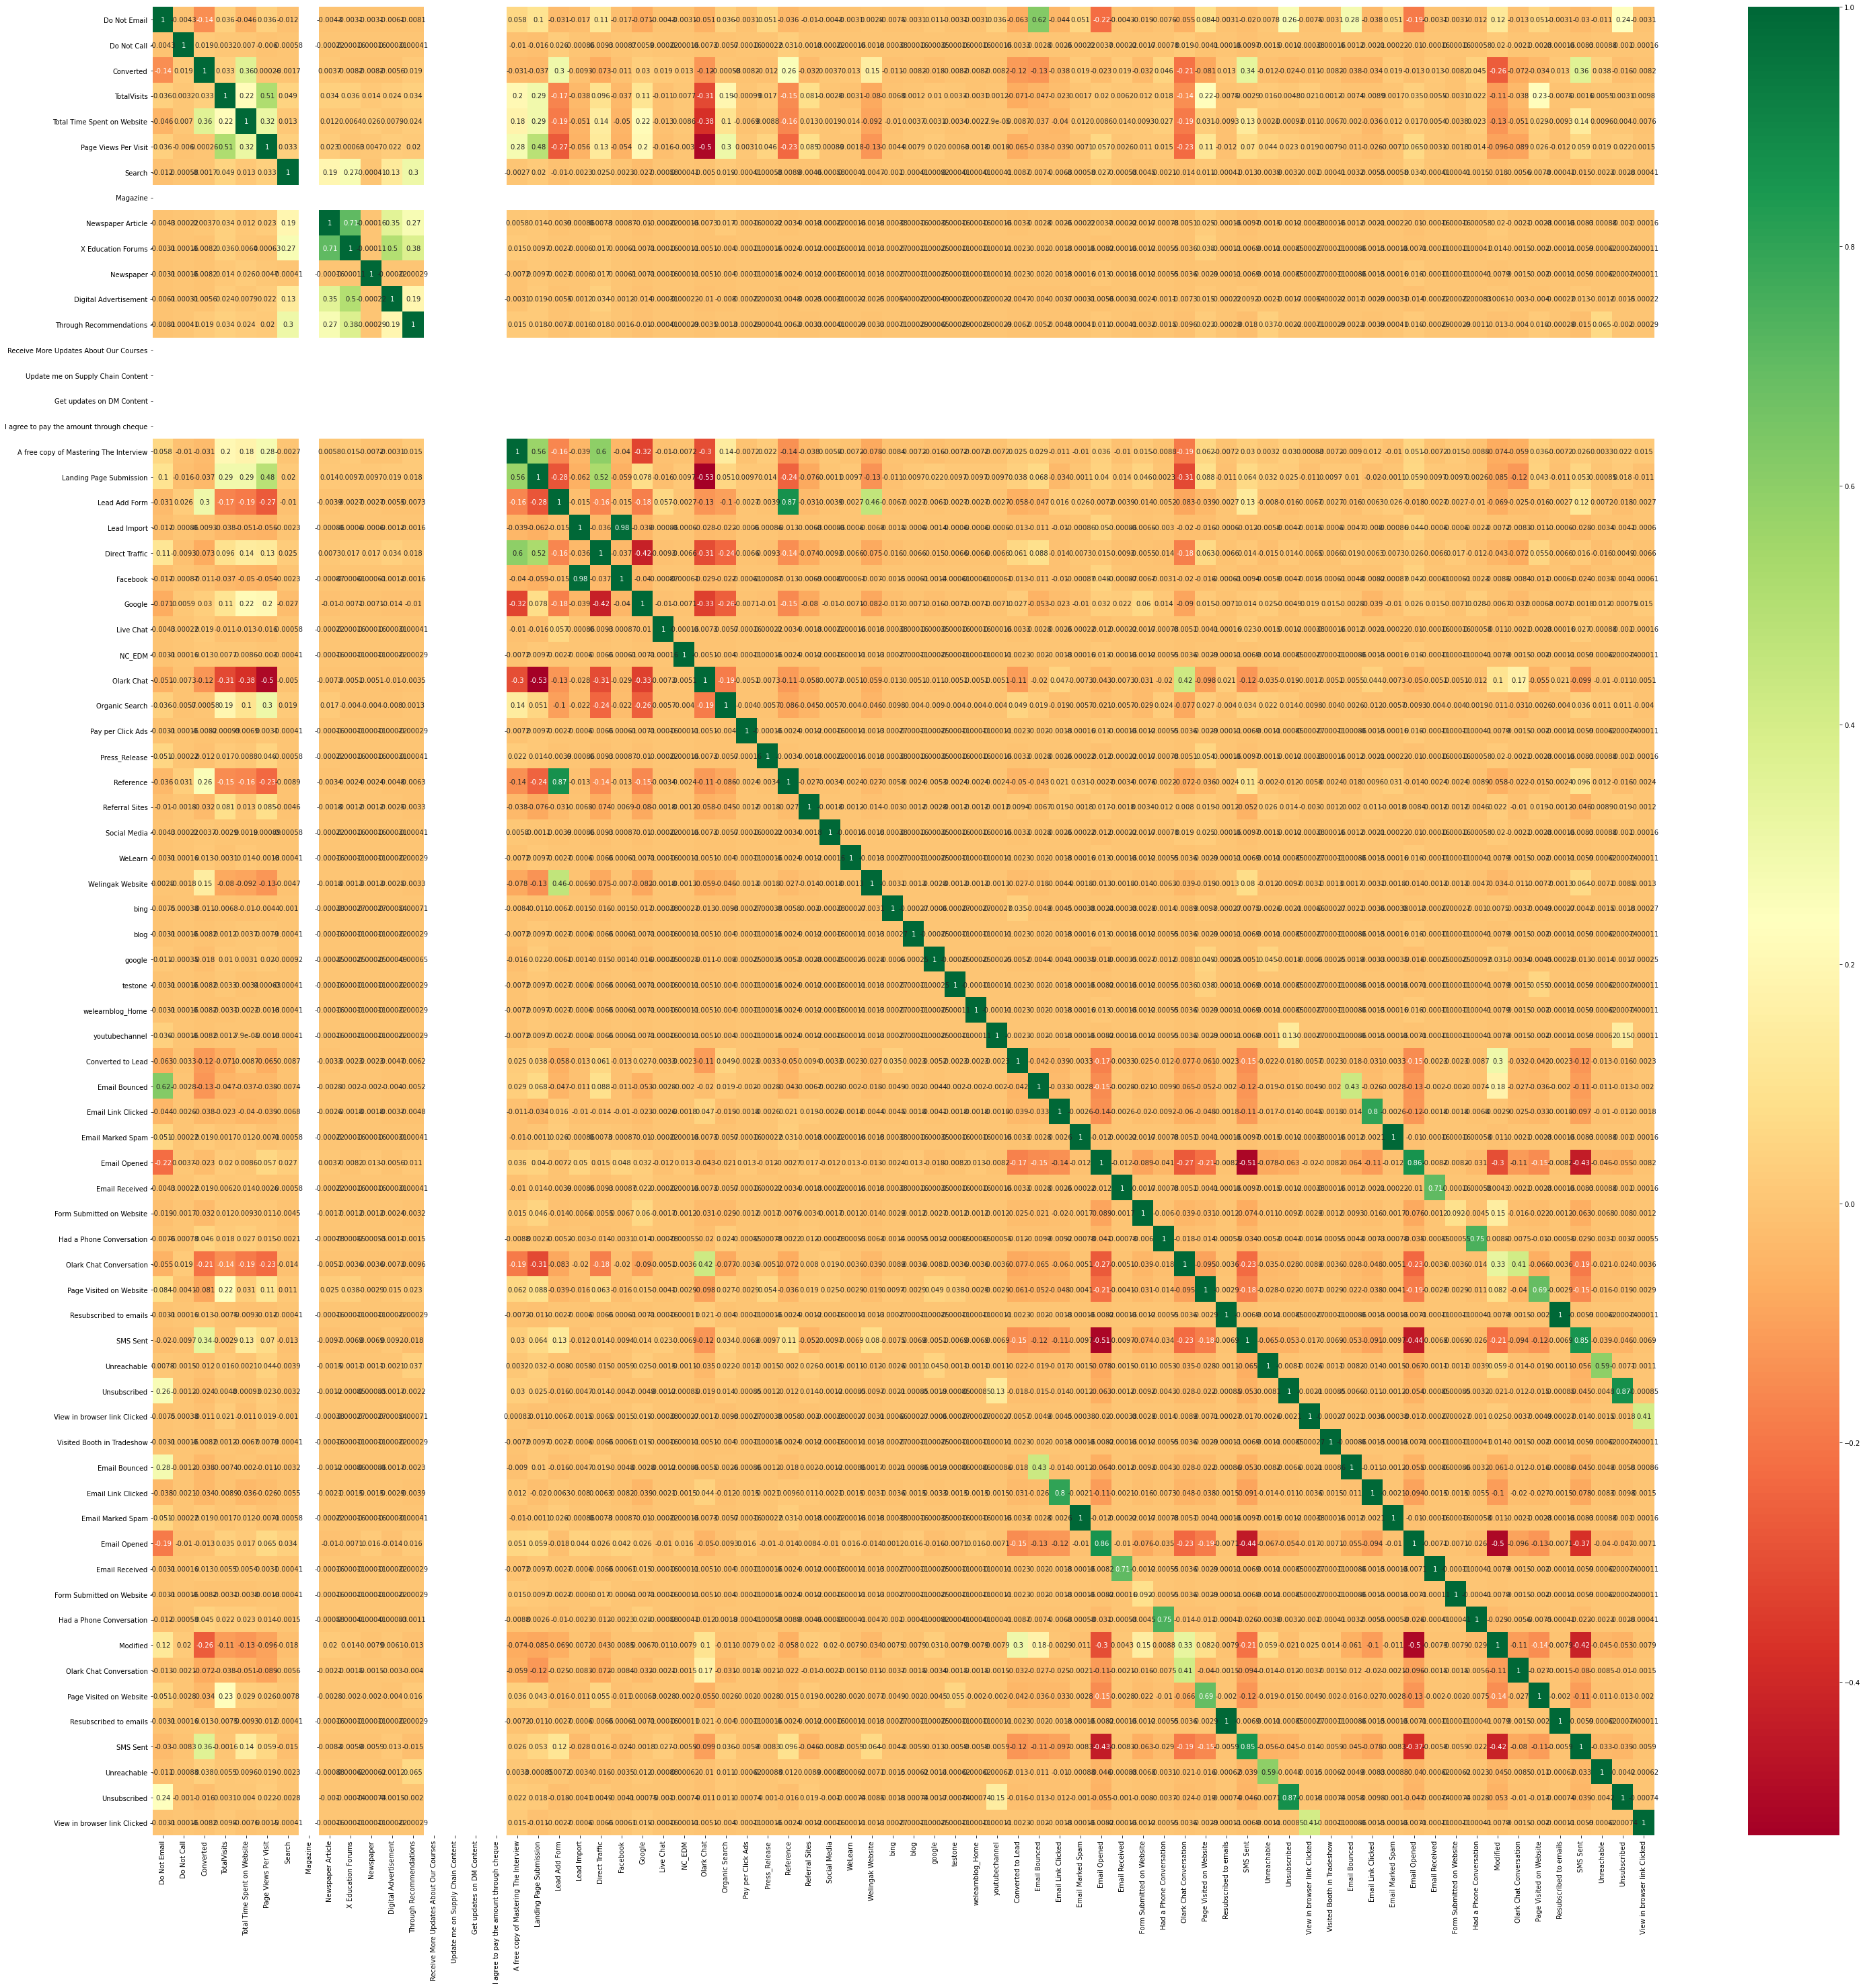

In [463]:
#Checking CO-Relations
plt.figure(figsize = (50,50))
sns.heatmap(lead.corr(),annot = True, cmap = 'RdYlGn')
plt.show()

In [464]:
#Train-Test split
from sklearn.model_selection import train_test_split

In [465]:
X = lead.drop(['Converted'],axis = 1)

In [466]:
y = lead['Converted']

In [467]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,test_size = 0.3,random_state = 100)

In [468]:
X_train.shape

(6351, 71)

In [469]:
X_test.shape

(2723, 71)

In [470]:
#Scaling of numerical variables
from sklearn.preprocessing import StandardScaler

In [471]:
num_vars = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

In [472]:
scaler = StandardScaler()

In [473]:
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [474]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Form Submitted on Website,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked
3009,0,0,-0.284595,-0.160255,-0.179666,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.284595,-0.540048,-0.179666,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-0.671384,-0.888650,-1.132538,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.284595,1.643304,-0.179666,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.295588,2.017593,0.058552,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


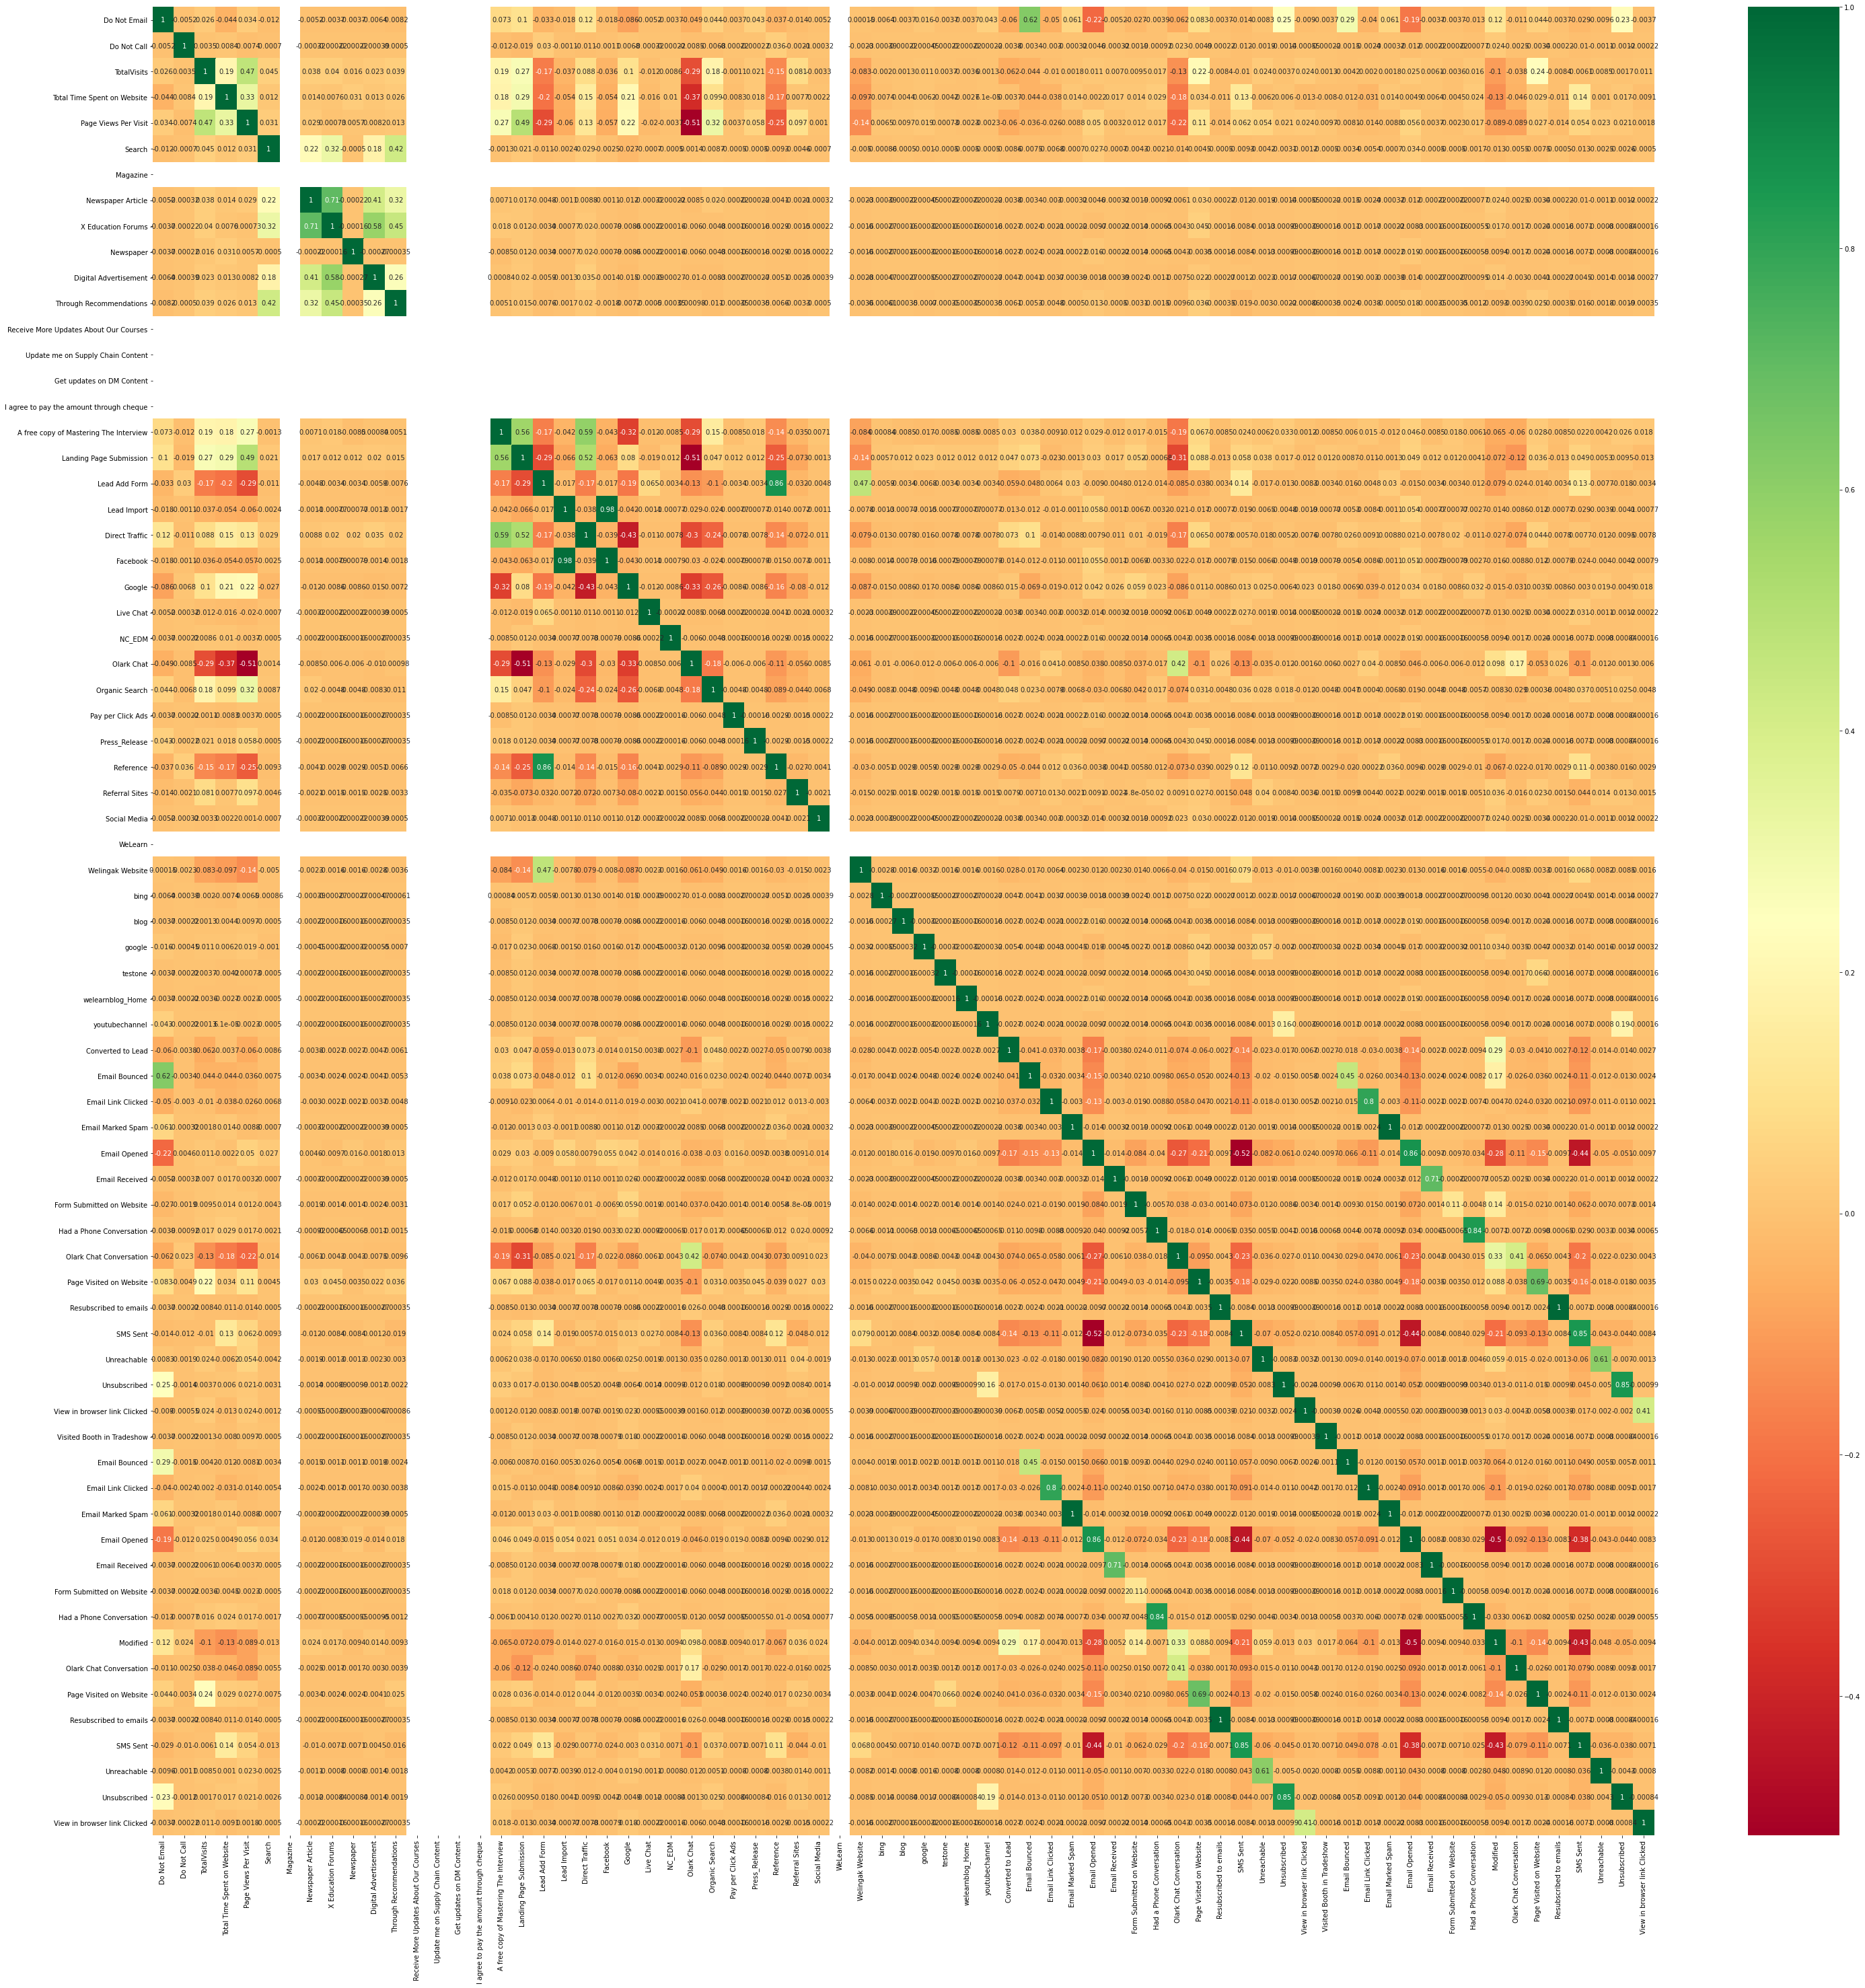

In [475]:
#Checking correlation
plt.figure(figsize = (50,50))
sns.heatmap(X_train.corr(), annot = True, cmap = 'RdYlGn')
plt.show()

In [476]:
#Building model using statsmodel
logreg1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())

In [477]:
logreg1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6287
Model Family:                Binomial   Df Model:                           63
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 13 Jun 2022   Deviance:                   1.4543e+05
Time:                        20:23:59   Pearson chi2:                 7.11e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                     3.481e+15    9.1e+07   3.83e+07      0.000    3.48e+15    3.48e+15
Do Not Email                             -3.963e+14   4.42e+06  -8.96e+07      0.000   -3.96e+14   -3.96e+14
Do Not Call                               3.001e+15   4.76e+07   6.31e+07      0.000       3e+15       3e+15
TotalVisits                               1.465e+14   9.97e+05   1.47e+08      0.000    1.46e+14    1.46e+14
Total Time Spent on Website               8.527e+14   9.71e+05   8.78e+08      0.000    8.53e+14    8.53e+14
Page Views Per Visit                     -6.862e+13   1.25e+06  -5.49e+07      0.000   -6.86e+13   -6.86e+13
Search                                    3.264e+14   2.38e+07   1.37e+07      0.000    3.26e+14    3.26e+14
Magazine                                   124.4610   1.03e-06   1.21e+08      0.000     124.461     124.461
Newspaper Article                          1.59e+16   6.73e+07   2.36e+08      0.000    1.59e+16    1.59e+16
X Education Forums                       -1.661e+16   1.12e+08  -1.48e+08      0.000   -1.66e+16   -1.66e+16
Newspaper                                -4.753e+15   6.72e+07  -7.07e+07      0.000   -4.75e+15   -4.75e+15
Digital Advertisement                     6.394e+13   4.76e+07   1.34e+06      0.000    6.39e+13    6.39e+13
Through Recommendations                  -8.701e+14   3.56e+07  -2.44e+07      0.000    -8.7e+14    -8.7e+14
Receive More Updates About Our Courses      29.7417   6.58e-07   4.52e+07      0.000      29.742      29.742
Update me on Supply Chain Content           42.9546   5.64e-07   7.62e+07      0.000      42.955      42.955
Get updates on DM Content                   -0.2096   3.39e-07  -6.19e+05      0.000      -0.210      -0.210
I agree to pay the amount through cheque  -145.2613   6.27e-07  -2.32e+08      0.000    -145.261    -145.261
A free copy of Mastering The Interview    1.516e+14   2.61e+06    5.8e+07      0.000    1.52e+14    1.52e+14
Landing Page Submission                   -3.24e+14   2.66e+06  -1.22e+08      0.000   -3.24e+14   -3.24e+14
Lead Add Form                             1.162e+14   4.76e+07   2.44e+06      0.000    1.16e+14    1.16e+14
Lead Import                               4.411e+15   6.86e+07   6.43e+07      0.000    4.41e+15    4.41e+15
Direct Traffic                           -9.345e+14   6.15e+07  -1.52e+07      0.000   -9.34e+14   -9.34e+14
Facebook                                 -5.911e+15    9.1e+07  -6.49e+07      0.000   -5.91e+15   -5.91e+15
Google                                    -4.74e+14   6.15e+07  -7.71e+06      0.000   -4.74e+14   -4.74e+14
Live Chat                                 5.588e+15   6.13e+07   9.11e+07      0.000    5.59e+15    5.59e+15
NC_EDM                         

In [478]:
#Feature Elimination using RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [479]:
from sklearn.feature_selection import RFE

In [480]:
rfe = RFE(logreg, n_features_to_select= 20)

In [481]:
rfe = rfe.fit(X_train,y_train)

In [482]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False, False,  True, False,  True, False,  True, False, False,
        True, False, False, False,  True,  True, False, False, False,
       False, False,  True,  True,  True, False, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
        True,  True,  True, False, False, False, False, False])

In [483]:
#Checking selected features
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 7),
 ('TotalVisits', False, 39),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 41),
 ('Search', False, 45),
 ('Magazine', False, 47),
 ('Newspaper Article', False, 28),
 ('X Education Forums', False, 27),
 ('Newspaper', True, 1),
 ('Digital Advertisement', False, 38),
 ('Through Recommendations', False, 13),
 ('Receive More Updates About Our Courses', False, 48),
 ('Update me on Supply Chain Content', False, 49),
 ('Get updates on DM Content', False, 50),
 ('I agree to pay the amount through cheque', False, 51),
 ('A free copy of Mastering The Interview', False, 46),
 ('Landing Page Submission', False, 35),
 ('Lead Add Form', True, 1),
 ('Lead Import', True, 1),
 ('Direct Traffic', False, 14),
 ('Facebook', False, 43),
 ('Google', False, 18),
 ('Live Chat', False, 37),
 ('NC_EDM', False, 23),
 ('Olark Chat', True, 1),
 ('Organic Search', False, 17),
 ('Pay per Click Ads', False, 33),
 ('Press_Release', Fa

In [484]:
col = X_train.columns[rfe.support_]

In [485]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Landing Page Submission',
       'Direct Traffic', 'Facebook', 'Google', 'Live Chat', 'NC_EDM',
       'Organic Search', 'Pay per Click Ads', 'Press_Release',
       'Referral Sites', 'WeLearn', 'bing', 'blog', 'testone',
       'welearnblog_Home', 'youtubechannel', 'Email Link Clicked',
       'Email Marked Spam', 'Email Opened', 'Email Received',
       'Form Submitted on Website', 'Resubscribed to emails', 'SMS Sent',
       'Unreachable', 'Unsubscribed', 'View in browser link Clicked',
       'Visited Booth in Tradeshow', 'Email Bounced', 'Email Marked Spam',
       'Email R

In [486]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6326
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2780.7
Date:                Mon, 13 Jun 2022   Deviance:                       5561.3
Time:                        20:24:05   Pearson chi2:                 6.50e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.3560      0.067      5.299      0.000       0.224       0.488
Do Not Email                   -1.5817      0.193     -8.210      0.000      -1.959      -1.204
Total Time Spent on Website     1.1499      0.040     29.004      0.000       1.072       1.228
Newspaper                     -23.3254   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Lead Add Form                   1.9850      0.925      2.145      0.032       0.172       3.798
Lead Import                     1.5532      0.433      3.589      0.000       0.705       2.401
Olark Chat                      1.1764      0.102     11.575      0.000       0.977       1.376
Reference                       2.2601      0.949      2.382      0.017       0.400       4.120
Social Media                    2.1333      1.440      1.481      0.139      -0.690       4.956
Welingak Website                3.8053      1.174      3.240      0.001       1.504       6.107
google                        -20.3746   1.26e+04     -0.002      0.999   -2.47e+04    2.46e+04
Converted to Lead              -1.2123      0.234     -5.183      0.000      -1.671      -0.754
Email Bounced                  -1.6357      0.625     -2.618      0.009      -2.861      -0.411
Email Bounced                   0.4520      0.783      0.577      0.564      -1.083       1.986
Had a Phone Conversation        1.4207      1.161      1.223      0.221      -0.856       3.697
Had a Phone Conversation        0.5307      1.590      0.334      0.739      -2.586       3.648
Olark Chat Conversation        -0.7740      0.103     -7.499      0.000      -0.976      -0.572
Olark Chat Conversation        -0.6879      0.186     -3.704      0.000      -1.052      -0.324
Page Visited on Website        -0.2894      0.113     -2.570      0.010      -0.510      -0.069
Page Visited on Website        -0.5563      0.149     -3.744      0.000      -0.848      -0.265
Email Link Clicked             -0.5264      0.374     -1.408      0.159      -1.259       0.206
Email Link Clicked             -1.3385      0.447     -2.996      0.003      -2.214      -0.463
Email Opened                   -0.2114      0.166     -1.274      0.203      -0.537       0.114
Email Opened                   -1.1864      0.186     -6.395      0.000      -1.550      -0.823
Modified                       -1.5707      0.129    -12.158      0.000      -1.824      -1.317
Olark Chat Conversation        -0.7740      0.103     -7.499      0.000      -0.976      -0.572
Olark Chat Conversation        -0.6879      0.186     -3.704      0.000      -1.052      -0.324
Page Visited on Website        -0.2894      0.113     -2.570      0.010      -0.510      -0.069
Page Visited on Website        -0.5563      0.149     -3.744      0.000      -0.848      -0.265
===========

In [487]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.226876
1012    0.046070
9226    0.257272
4750    0.904279
7987    0.751272
1281    0.803799
2880    0.113529
4971    0.927257
7536    0.891832
1248    0.715419
dtype: float64

In [488]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.22687626, 0.04606962, 0.25727243, 0.9042791 , 0.75127187,
       0.80379937, 0.11352857, 0.92725686, 0.89183217, 0.71541944])

In [489]:
#Creating a dataframe with the actual converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'converted':y_train.values, 'convert_Probability':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

,converted,convert_Probability,ID
0,0,0.226876,3009
1,0,0.046070,1012
2,0,0.257272,9226
3,1,0.904279,4750
4,1,0.751272,7987


In [490]:
#If probability is greater than 0.5 then customer is converted
y_train_pred_final['Con_predicted'] = y_train_pred_final.convert_Probability.map(lambda x: 1 if x > 0.5 else 0)

In [491]:
y_train_pred_final.head()

,converted,convert_Probability,ID,Con_predicted
0,0,0.226876,3009,0
1,0,0.046070,1012,0
2,0,0.257272,9226,0
3,1,0.904279,4750,1
4,1,0.751272,7987,1


In [492]:
#Confusion Matrix
from sklearn import metrics

In [493]:
confusion = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.Con_predicted )
confusion

array([[3422,  483],
       [ 784, 1662]], dtype=int64)

In [494]:
#Checking Accuracy
metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.Con_predicted)

0.800503857660211

In [495]:
#Checking for Vriance Influence Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [496]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
27,Page Visited on Website,inf
15,Olark Chat Conversation,inf
26,Page Visited on Website,inf
25,Olark Chat Conversation,inf
24,Olark Chat Conversation,inf
18,Page Visited on Website,inf
17,Page Visited on Website,inf
16,Olark Chat Conversation,inf
3,Lead Add Form,62.43
6,Reference,47.99


In [497]:
#Dropping columns with high VIF
col = col.drop(['Page Visited on Website','Olark Chat Conversation','Page Visited on Website','Olark Chat Conversation','Olark Chat Conversation','Page Visited on Website','Page Visited on Website','Olark Chat Conversation','Lead Add Form','Reference'], 1)

In [498]:
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Newspaper',
       'Lead Import', 'Olark Chat', 'Social Media', 'Welingak Website',
       'google', 'Converted to Lead', 'Email Bounced',
       'Had a Phone Conversation', 'Email Link Clicked', 'Email Opened',
       'Modified'],
      dtype='object')

In [499]:
#Rebuilding model
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3289.4
Date:                Mon, 13 Jun 2022   Deviance:                       6578.8
Time:                        20:24:06   Pearson chi2:                 6.28e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.4246      0.055      7.701      0.000       0.317       0.533
Do Not Email                   -1.4234      0.171     -8.337      0.000      -1.758      -1.089
Total Time Spent on Website     0.8188      0.034     24.313      0.000       0.753       0.885
Newspaper                     -22.9242   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Lead Import                     0.9123      0.431      2.117      0.034       0.068       1.757
Olark Chat                      0.2085      0.087      2.401      0.016       0.038       0.379
Social Media                    1.2361      1.477      0.837      0.403      -1.659       4.131
Welingak Website                5.2260      0.727      7.191      0.000       3.802       6.650
google                        -20.2835    1.3e+04     -0.002      0.999   -2.55e+04    2.54e+04
Converted to Lead              -0.8884      0.209     -4.254      0.000      -1.298      -0.479
Email Bounced                  -1.3913      0.610     -2.281      0.023      -2.587      -0.196
Email Bounced                   0.2295      0.765      0.300      0.764      -1.270       1.729
Had a Phone Conversation        1.6373      1.078      1.519      0.129      -0.475       3.750
Had a Phone Conversation        0.1772      1.519      0.117      0.907      -2.799       3.153
Email Link Clicked              0.3350      0.320      1.048      0.295      -0.292       0.962
Email Link Clicked             -1.7376      0.393     -4.426      0.000      -2.507      -0.968
Email Opened                    0.4525      0.135      3.357      0.001       0.188       0.717
Email Opened                   -1.5136      0.153     -9.900      0.000      -1.813      -1.214
Modified                       -1.7639      0.091    -19.428      0.000      -1.942      -1.586
===============================================================================================
"""

In [500]:
#Predicting values
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [501]:
y_train_pred[:10]

array([0.31697744, 0.06896066, 0.13488718, 0.85448349, 0.57757597,
       0.76409566, 0.2045442 , 0.87905856, 0.8330723 , 0.54540548])

In [502]:
y_train_pred_final['convert_Probability'] = y_train_pred

In [503]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['Con_predicted'] = y_train_pred_final.convert_Probability.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,converted,convert_Probability,ID,Con_predicted
0,0,0.316977,3009,0
1,0,0.068961,1012,0
2,0,0.134887,9226,0
3,1,0.854483,4750,1
4,1,0.577576,7987,1


In [504]:
# Check overall accuracy.
metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.Con_predicted)

0.7362620059833097

In [505]:
#Check for VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,Email Opened,7.36
16,Email Opened,7.14
11,Had a Phone Conversation,3.42
12,Had a Phone Conversation,3.41
13,Email Link Clicked,3.03
14,Email Link Clicked,3.00
9,Email Bounced,2.03
17,Modified,2.03
0,Do Not Email,1.76
4,Olark Chat,1.38


In [506]:
#Maximun 5 VIF is acceptable so dropping columns with VIF>5
col = col.drop(['Email Opened','Email Opened','Had a Phone Conversation'],1)

In [507]:
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Newspaper',
       'Lead Import', 'Olark Chat', 'Social Media', 'Welingak Website',
       'google', 'Converted to Lead', 'Email Bounced', 'Email Link Clicked',
       'Modified'],
      dtype='object')

In [508]:
#Rebuilding model
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3407.9
Date:                Mon, 13 Jun 2022   Deviance:                       6815.7
Time:                        20:24:06   Pearson chi2:                 6.25e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.1243      0.038     -3.235      0.001      -0.200      -0.049
Do Not Email                   -1.0362      0.165     -6.279      0.000      -1.360      -0.713
Total Time Spent on Website     0.8276      0.033     25.095      0.000       0.763       0.892
Newspaper                     -23.4579   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Lead Import                     0.5821      0.434      1.342      0.180      -0.268       1.432
Olark Chat                      0.2186      0.085      2.577      0.010       0.052       0.385
Social Media                    1.1154      1.478      0.755      0.450      -1.781       4.012
Welingak Website                5.2105      0.722      7.218      0.000       3.796       6.625
google                        -20.4510   1.32e+04     -0.002      0.999   -2.58e+04    2.58e+04
Converted to Lead              -1.0128      0.205     -4.950      0.000      -1.414      -0.612
Email Bounced                  -1.8710      0.608     -3.075      0.002      -3.063      -0.679
Email Bounced                   0.8676      0.763      1.137      0.256      -0.628       2.364
Email Link Clicked              0.2135      0.317      0.673      0.501      -0.408       0.835
Email Link Clicked             -1.0695      0.389     -2.750      0.006      -1.832      -0.307
Modified                       -1.0954      0.071    -15.434      0.000      -1.234      -0.956
===============================================================================================
"""

In [509]:
#Here we can see some columns have high P-values we need to drop them
col = col.drop(['Newspaper','google','Social Media','Email Link Clicked','Email Bounced'],1)

In [510]:
#Rebuilding model
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6343
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3428.8
Date:                Mon, 13 Jun 2022   Deviance:                       6857.6
Time:                        20:24:07   Pearson chi2:                 6.28e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.1411      0.038     -3.718      0.000      -0.215      -0.067
Do Not Email                   -1.3700      0.147     -9.294      0.000      -1.659      -1.081
Total Time Spent on Website     0.8278      0.033     25.198      0.000       0.763       0.892
Lead Import                     0.5990      0.434      1.381      0.167      -0.251       1.449
Olark Chat                      0.2070      0.085      2.449      0.014       0.041       0.373
Welingak Website                5.2690      0.723      7.283      0.000       3.851       6.687
Converted to Lead              -0.9963      0.204     -4.880      0.000      -1.396      -0.596
Modified                       -1.0949      0.069    -15.840      0.000      -1.230      -0.959
===============================================================================================
"""

In [511]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.Con_predicted )
confusion

array([[3347,  558],
       [1117, 1329]], dtype=int64)

In [512]:
#Checking Accuracy
metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.Con_predicted)

0.7362620059833097

In [514]:
#Above Model is final model with accuracy of 73.62%